In [1]:
from msa_planner import *
np.random.seed(42)
N = 50

ra, dec = 53 + np.random.rand(N)*0.08, -27 + np.random.rand(N)*0.08
msa_model = MSAModel('esa_msa_map_APT_2025.5.3.dat', './msa_v2v3.dat',
                     ra_sources=ra, dec_sources=dec, flux_sources=None,
                     radius_source=0.06, flux_threshold=0.5, buffer=UNCONSTRAINED)

# Optimize
optimizer = MSAOptimizer(msa_model)
results = optimizer.grid_search(53, -27, 30, 
                                dra = 0.05, ddec = 0.05, dpa = 30,
                                n_steps=(50,50,50))
print(f'Maximum objects in open shutters: {np.max(results["score"])}/{len(ra)}')

optimized_results = optimizer.optimize_top_solutions(results, n_top=10, maxiter=300)
print(f'Maximum objects in open shutters: {optimized_results["score"][0]}/{len(ra)}')

100%|██████████| 125000/125000 [00:23<00:00, 5431.48it/s]


Top 10 scores from grid search:
  1: Score=20.0, (RA, Dec, V3_PA)=(53.02551020, -26.95816327, 24.49)
  2: Score=19.0, (RA, Dec, V3_PA)=(53.03979592, -26.96836735, 52.65)
  3: Score=19.0, (RA, Dec, V3_PA)=(53.03163265, -26.96428571, 39.18)
  4: Score=18.0, (RA, Dec, V3_PA)=(53.03571429, -26.95816327, 36.73)
  5: Score=18.0, (RA, Dec, V3_PA)=(53.03163265, -26.95204082, 56.33)
  6: Score=18.0, (RA, Dec, V3_PA)=(53.02755102, -26.95816327, 18.37)
  7: Score=18.0, (RA, Dec, V3_PA)=(53.03163265, -26.95000000, 55.10)
  8: Score=18.0, (RA, Dec, V3_PA)=(53.03163265, -26.95204082, 57.55)
  9: Score=18.0, (RA, Dec, V3_PA)=(53.03979592, -26.97448980, 0.00)
  10: Score=17.0, (RA, Dec, V3_PA)=(53.03571429, -26.96020408, 26.94)
Maximum objects in open shutters: 20.0/50
Optimizing No.1 best solution:
  Final/Initial score: 22/20
  Initial params: (RA, Dec, PA)=(53.02551020, -26.95816327, 24.4898)
  Final params: (RA, Dec, PA)=(53.02616946, -26.95864672, 24.2519)
Optimizing No.2 best solution:
  Final/I

MSA pointing: RA=53.03039963, Dec=-26.96560553, V3_PA=42.8078
              03 32 07.2959 -26 57 56.1799, Aperture PA: 181.38 deg
Number of sources: 50
Number of sources in open shutters: 25


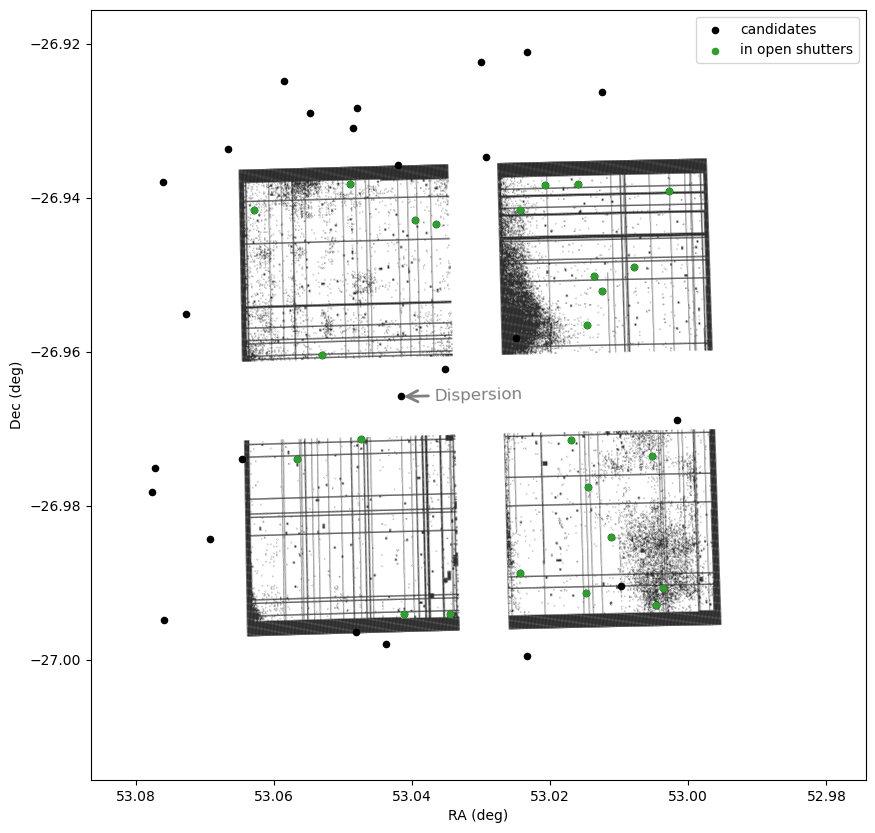

In [2]:
show_msa_result(msa_model, optimized_results['ra'][0], optimized_results['dec'][0], optimized_results['pa'][0])